In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Delta\\Downloads\\cluster_data.csv - cluster_data.csv.csv")

In [5]:
print(df.shape)
df.head()

(2300, 2)


,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

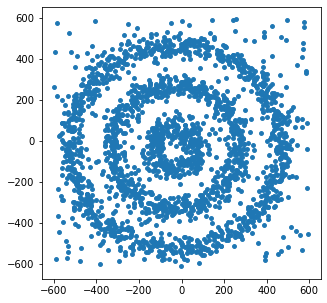

In [13]:
plt.figure(figsize=(5,5))

plt.scatter(df["0"], df["1"], s=15)

# ....KMeans for getting optimal number of .... K



In [14]:
from sklearn.cluster import KMeans

In [59]:
k = range(1, 11)
ssd = []
for i in k :
    model = KMeans(n_clusters = i)
    model.fit(df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, ' k-cluster vs ssd ')

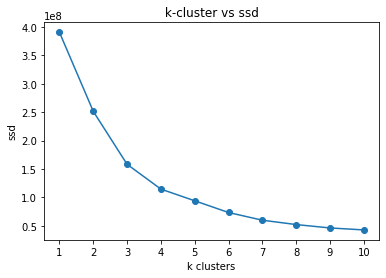

In [60]:
plt.plot(k, ssd, marker='o')
plt.xticks(k)

plt.xlabel("k clusters")
plt.ylabel("ssd")
plt.title(" k-cluster vs ssd ")

In [61]:
model = KMeans(n_clusters = 4)
model.fit(df)

KMeans(n_clusters=4)

Text(0, 0.5, 'feature 2 ')

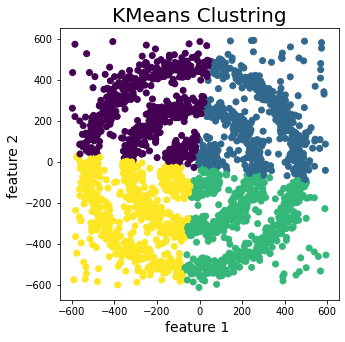

In [62]:
#we don't want this kind of clustring #pizzaSlice
#we want it clustring by rings #saturn rings

plt.figure(figsize=(5,5))
plt.scatter(df["0"], df["1"], c = model.labels_)
plt.title("KMeans Clustring", fontsize = 20)
plt.xlabel("feature 1 ", fontsize=14)
plt.ylabel("feature 2 ", fontsize=14)

# Hierarchical clustering


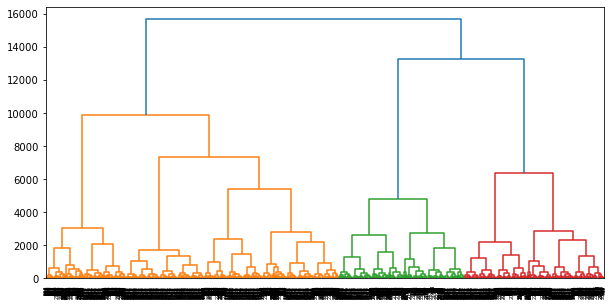

In [63]:
#hierarchical clustering

from scipy.cluster import hierarchy
fig = plt.figure(figsize=(10,5))
den = hierarchy.dendrogram(hierarchy.linkage(df, method = 'ward'))

In [67]:
#incomplete cells for hie. clustering

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
model.fit(df)

AgglomerativeClustering(n_clusters=4)

# DBSCAN -- Density-Based Spatial Clustering of Applications with Noise.

In [68]:
#DBSCAN

#plot k-distance plot

from sklearn.neighbors import NearestNeighbors

n = NearestNeighbors(n_neighbors=2)
n.fit = n.fit(df)
distances, indices = n.fit.kneighbors(df)

In [69]:
distances

array([[ 0.        ,  6.91861073],
       [ 0.        , 10.80836521],
       [ 0.        ,  7.56030266],
       ...,
       [ 0.        , 25.77071119],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

In [70]:
distances  = np.sort(distances, axis = 0)
distances = distances[:, 1]


Text(0.5, 0, 'Data points sorted by distance')

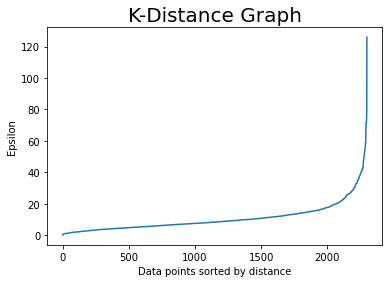

In [71]:
plt.plot(distances)
plt.title("K-Distance Graph", fontsize = 20)
plt.ylabel("Epsilon")
plt.xlabel("Data points sorted by distance")

In [56]:

eps = 30 #epsilon --- elbo point ....taken from above fig .... approx. 
from sklearn.cluster import DBSCAN
#min_samples are greater than equal to the grouping points.. here K= 3 or 4
model = DBSCAN(eps= 30, min_samples=5)

model.fit(df)   

DBSCAN(eps=30)

Text(0, 0.5, 'Feature 2')

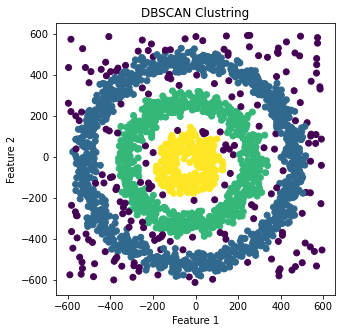

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(df['0'], df['1'], c = model.labels_)
plt.title("DBSCAN Clustring")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt. 
#for min_sample =3 ......plot is very messy so went for min_sample=4

#outliers are classified by purple color...
#hence dbscan classifies better than hierarchical and KMeans clustering for this dataset